## 損失関数

### 二乗和誤差

In [5]:
import numpy as np

In [6]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [15]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [17]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.5975

### 交差エントロピー誤差

In [21]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))#np.log(0)が-infとなるためdeltaを加算

In [22]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [23]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

##  ミニバッチ学習

In [25]:
import sys, os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [33]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)#[0, 6000)の中からbatch_size=10個の数字をリストで返す
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape)
print(t_batch.shape)

(10, 784)
(10, 10)


In [29]:
np.random.choice(train_size, batch_size)

array([51952,  8494, 54953, 55386, 22490,  7594, 47856,    65, 13698,
       24580])

### バッチ対応交差エントロピー誤差

In [30]:
#for one-hot
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [39]:
# for label
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size #y[np.arrange(batch_size), t]はy[0,t], y[0, t],...となる

## 数値微分

In [42]:
#　悪い実装例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [44]:
np.float32(1e-50) #丸め誤差

0.0

In [56]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h))/(2*h)#誤差を減らすために中心差分を用いる

In [57]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1*x

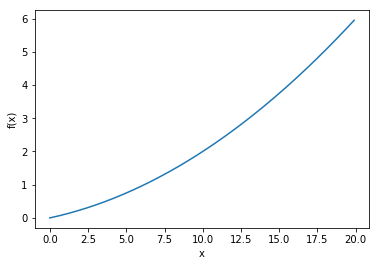

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [72]:
a1 = numerical_diff(function_1, 5)
a1

0.1999999999990898

In [73]:
a2 = numerical_diff(function_1, 10)
a2

0.2999999999986347

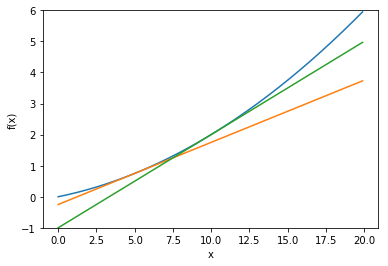

In [81]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
y1 = a1* x + (function_1(5)- a1*5)
y2 = a2 * x +(function_1(10)- a2*10)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-1.0, 6)
plt.show()

0.1999999999990898
0.2999999999986347


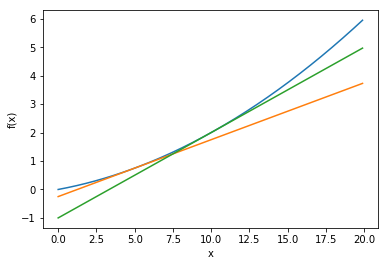

In [78]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")


tf = tangent_line(function_1, 5)
y1 = tf(x)
tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

## 偏微分

$$f(x_{0}, x_{1})=x^{2}_{0}+x^{2}_{1}$$

In [82]:
def function_2(x):
    return np.sum(x**2)

x0 = 3, x1 = 4の時の偏微分 

In [87]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [85]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [88]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 勾配

In [95]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列作成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #値を元に戻す
        
    return grad

In [96]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

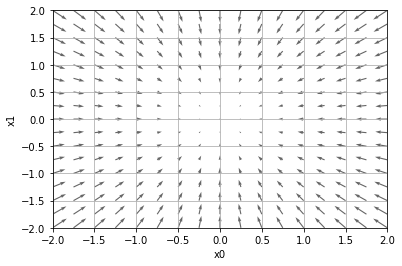

In [99]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
    
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

## 勾配法

In [100]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [102]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)#ほとんど原点の(0, 0)を指している

array([-6.11110793e-10,  8.14814391e-10])

In [110]:
#学習率が大きい時
init_x = np.array([-3.0, 4.0])#init_xは書き換えられてしまうため再度定義
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)#発散してしまう

array([-2.58983747e+13, -1.29524862e+12])

In [111]:
#学習率が小さい時
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)#学習が収束しない

array([-2.99999994,  3.99999992])

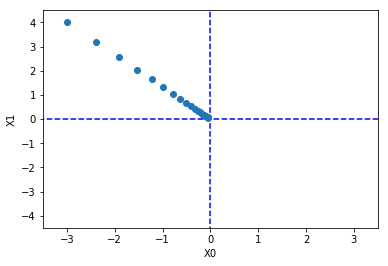

In [113]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## ニューラルネットに対する勾配

In [117]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)#ガウス分布で初期化
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [121]:
net = simpleNet()
print(net.W)

[[ 0.74879119  0.39700938 -1.40382842]
 [-0.46598685 -0.91559846  1.87779847]]


In [124]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)#最大値のインデックス

[ 0.02988655 -0.58583298  0.84772157]


2

In [126]:
t = np.array([0, 0, 1]) #正解ラベル
net.loss(x, t)

0.518701959062144

In [127]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.15765236  0.08517201 -0.24282436]
 [ 0.23647854  0.12775801 -0.36423654]]


In [128]:
f = lambda w: net.loss(x, t)#lambdaを使って記述することもできる
dW = numerical_gradient(f, net.W)

## 学習アルゴリズムの実装

In [149]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params ['W2']
        b1, b2 = self.params['b1'], self.params ['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [140]:
net = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [154]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

for i in range(iters_num):
    
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch, t_batch)
    #print("iters:{} Loss:{}".format(i, loss))
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.7858333333333334, 0.7919
train acc, test acc | 0.8766, 0.8799
train acc, test acc | 0.8996833333333333, 0.9022
train acc, test acc | 0.9099833333333334, 0.9118
train acc, test acc | 0.9168166666666666, 0.9191
train acc, test acc | 0.9226166666666666, 0.9239
train acc, test acc | 0.9259333333333334, 0.9259
train acc, test acc | 0.9295333333333333, 0.9311
train acc, test acc | 0.9328333333333333, 0.9333
train acc, test acc | 0.9359666666666666, 0.9355
train acc, test acc | 0.9384, 0.9391
train acc, test acc | 0.9408666666666666, 0.94
train acc, test acc | 0.9425333333333333, 0.9416
train acc, test acc | 0.9451333333333334, 0.944
train acc, test acc | 0.9463333333333334, 0.9453
train acc, test acc | 0.9485833333333333, 0.9471


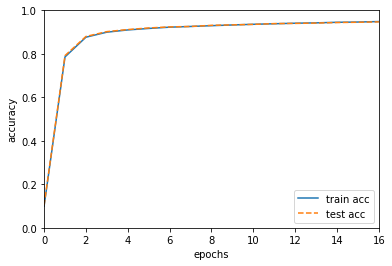

In [155]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()

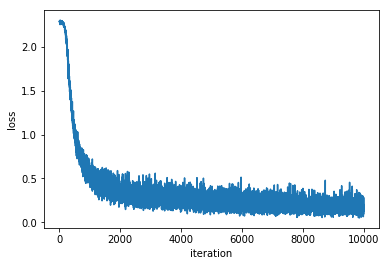

In [156]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()